 Project 1 : Kannada MNIST - Classification Problem

In [ ]:
import numpy as np
import pandas as pd
from numpy import load
from sklearn.decomposition import PCA
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#LOADING TRAINING AND TEST DATA

data = load('C:/Users/Hema Chandran/anacond/pkgs/ipykernel-6.25.0-py311h746a85d_0/Lib/site-packages/finalproj/Kannada_MNIST/X_kannada_MNIST_test.npz')
lst = data .files
for item in lst :
    x_test = data[item]
data = load('C:/Users/Hema Chandran/anacond/pkgs/ipykernel-6.25.0-py311h746a85d_0/Lib/site-packages/finalproj/Kannada_MNIST/y_kannada_MNIST_test.npz')
lst = data .files
for item in lst :
    y_test = data[item]
data = load('C:/Users/Hema Chandran/anacond/pkgs/ipykernel-6.25.0-py311h746a85d_0/Lib/site-packages/finalproj/Kannada_MNIST/X_kannada_MNIST_train.npz')
lst = data .files
for item in lst :
    x_train = data[item]
data = load('C:/Users/Hema Chandran/anacond/pkgs/ipykernel-6.25.0-py311h746a85d_0/Lib/site-packages/finalproj/Kannada_MNIST/y_kannada_MNIST_train.npz')
lst = data .files
for item in lst :
    y_train = data[item]
print(x_test.shape)
print(x_train.shape)
print(y_test.shape)
print(y_train.shape)
print(x_test)






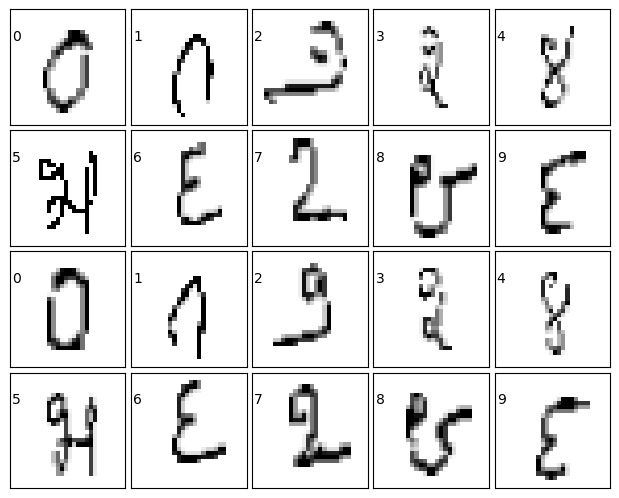

In [33]:
# PLOTTING THE IMAGES FROM THE TRAINING DATA

fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(20):
    ax = fig.add_subplot(5, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(x_train[i], cmap=plt.cm.binary, interpolation='nearest')
   
    ax.text(0, 7, str(y_train[i]))

In [34]:
# RESHAPING THE TRAINING DATA
Xtrain = x_train.reshape(60000, 784) 
Xtest = x_test.reshape(10000, 784)  

# Change integers to 32-bit floating point numbers
#Xtrain = x_train.astype('float32')   
#Xtest = x_test.astype('float32')

print("Training matrix shape", Xtrain.shape)
print("Testing matrix shape", Xtest.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [35]:
# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA

pca = PCA(n_components = 10)

X_train = pca.fit_transform(Xtrain)
X_test = pca.transform(Xtest)

explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.07972071 0.05570993 0.04466606 0.03657989 0.03445836 0.02782341
 0.02437061 0.02091766 0.02036116 0.01722755]


In [36]:
print(X_train.shape)
print(X_test.shape)


(60000, 10)
(10000, 10)


In [37]:
X_mean = X_train.mean()
 
# Standard deviation
X_std = X_train.std()
 
# Standardization
Z = (X_train - X_mean) / X_std
print(Z.shape)

(60000, 10)


In [38]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


APPLYING DECISION TREE ALGORITHM TO FIND THE ACCURACY

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from graphviz import Source
 

In [40]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [41]:
y_pred =clf.predict(X_test)

In [42]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7982


In [ ]:
APPLYING RANDOM FOREST CLASSIFIER ALGORITHM TO FIND THE ACCURACY

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")



Accuracy: 0.88
